In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [2]:
import sys
sys.modules.pop
sys.path.insert(0,'PHD_Code/CODE')

clear_output()

In [3]:
PATH_DATA = 'DATA/'
PATH_FIGS = 'FIGS/'


In [4]:
import Enums
import Option_formulas
import Miscellanea
import Deep_learning_models
import ModelHandlers
import Scenario_Simulation

In [5]:
data = pd.read_excel(PATH_DATA + 'Hist_data.xlsx', index_col = 'Dates')

<AxesSubplot:xlabel='Dates'>

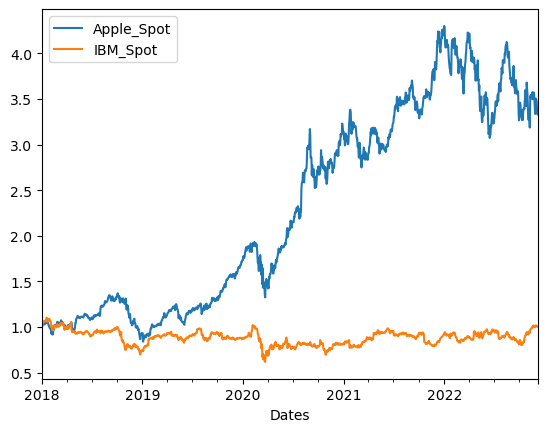

In [6]:
data_18 = data['2018':]

data_18 = data_18 / data_18.iloc[0]

data_18[['Apple_Spot', 'IBM_Spot']].plot()

In [7]:
rets = data['2018':].pct_change(10).dropna()[['Apple_Spot', 'IBM_Spot']].values

(array([  2.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   4.,   1.,
          0.,   2.,   4.,   5.,   8.,  12.,  13.,  23.,  25.,  37.,  40.,
         44.,  36.,  43.,  57.,  95.,  96., 115., 132., 110.,  90.,  83.,
         73.,  32.,  36.,  13.,  16.,   9.,   6.,   7.,   2.,   0.,   1.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([-0.23003006, -0.22161574, -0.21320142, -0.2047871 , -0.19637279,
        -0.18795847, -0.17954415, -0.17112983, -0.16271551, -0.1543012 ,
        -0.14588688, -0.13747256, -0.12905824, -0.12064392, -0.11222961,
        -0.10381529, -0.09540097, -0.08698665, -0.07857233, -0.07015802,
        -0.0617437 , -0.05332938, -0.04491506, -0.03650074, -0.02808643,
        -0.01967211, -0.01125779, -0.00284347,  0.00557085,  0.01398516,
         0.02239948,  0.0308138 ,  0.03922812,  0.04764244,  0.05605675,
         0.06447107,  0.07288539,  0.08129971,  0.08971403,  0.09812834,
         0.10654266,  0.11495698,  0.1233713 ,  0.13178562,  0.14019993,
 

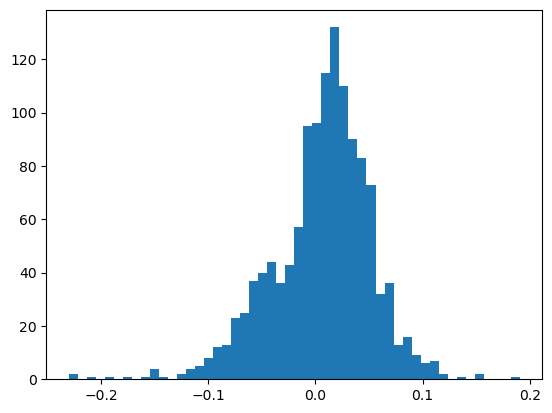

In [8]:
plt.hist(np.matmul(rets, np.array([0.5,0.5])), bins = 50)

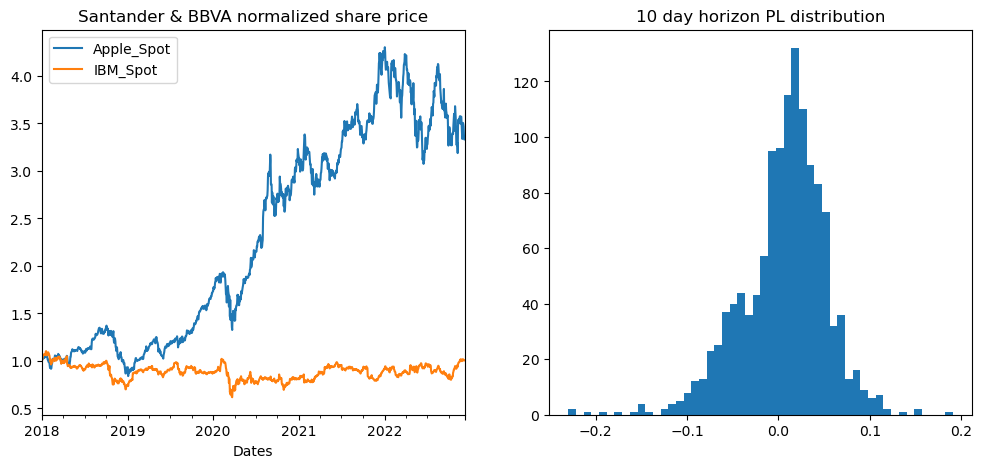

In [9]:
f, x = plt.subplots(2,2)

data_18[['Apple_Spot', 'IBM_Spot']].plot(ax = x[0], title = "Santander & BBVA normalized share price")
x[1].hist(np.matmul(rets, np.array([0.5,0.5])), bins = 50);

x[1].set_title("10 day horizon PL distribution")

f.set_size_inches(12,5)

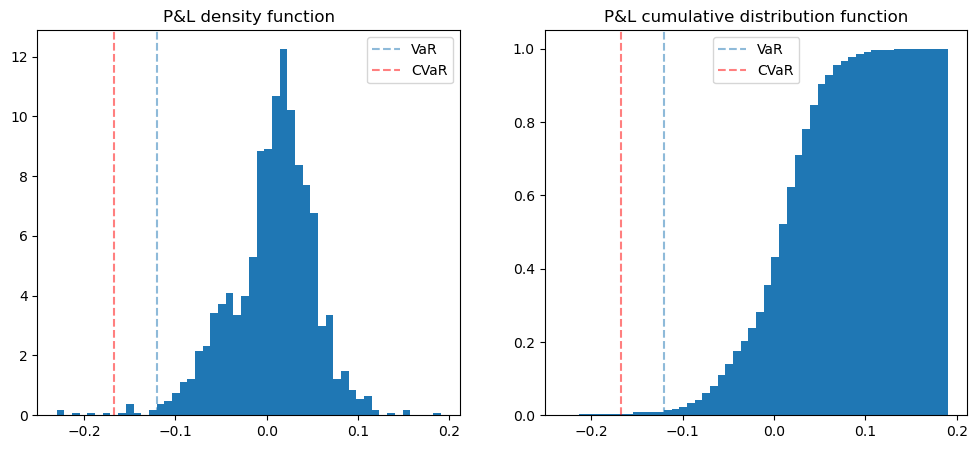

In [10]:
f, x = plt.subplots(1,2)

pl = np.matmul(rets, np.array([0.5,0.5]))

alpha = 0.99

var = np.quantile(pl, 1-alpha)

cvar = np.mean(pl[pl<var])

x[0].hist(pl, bins = 50, density = True, cumulative = False)
x[0].axvline(var, ls = '--', label = 'VaR', alpha = 0.5);
x[0].axvline(cvar, ls = '--', label = 'CVaR', color = 'red', alpha = 0.5);

x[1].hist(pl, bins = 50, density = True, cumulative = True)
x[1].axvline(var, ls = '--', label = 'VaR', alpha = 0.5);
x[1].axvline(cvar, ls = '--', label = 'CVaR', color = 'red', alpha = 0.5);

x[0].legend()
x[1].legend()

x[0].set_title("P&L density function")
x[1].set_title("P&L cumulative distribution function")

f.set_size_inches(12,5)

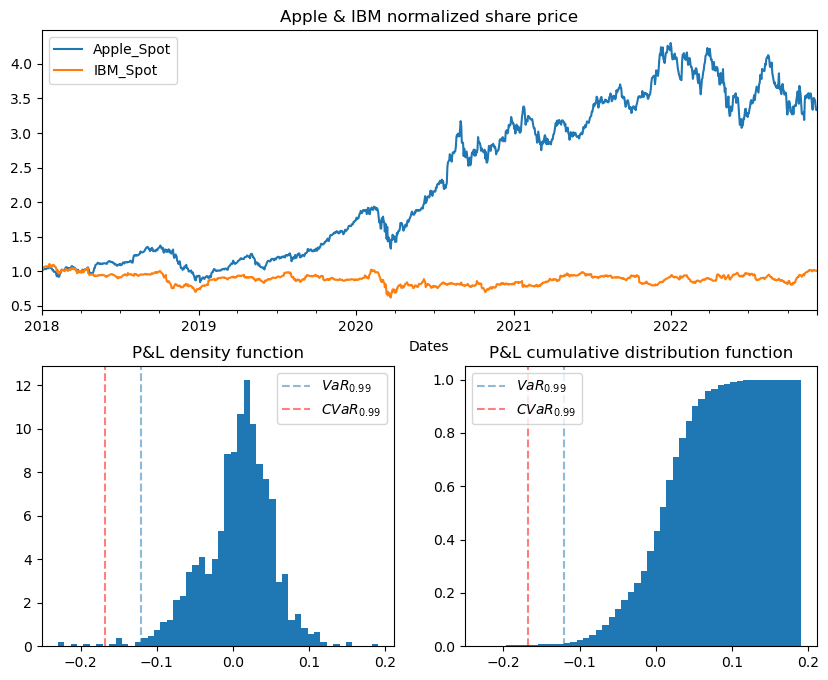

In [44]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(10, 8))

# Define the grid layout
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1]) 

# Add subplots
ax1 = fig.add_subplot(gs[0, :]) # First plot, spans all columns in the first row
ax2 = fig.add_subplot(gs[1, 0]) # Second plot, in the second row, first column
ax3 = fig.add_subplot(gs[1, 1]) # Third plot, in the second row, second column

# Example plotting
data_18[['Apple_Spot', 'IBM_Spot']].plot(ax = ax1, title = "Apple & IBM normalized share price")

pl = np.matmul(rets, np.array([0.5,0.5]))

alpha = 0.99

var = np.quantile(pl, 1-alpha)

cvar = np.mean(pl[pl<var])

ax2.hist(pl, bins = 50, density = True, cumulative = False)
ax2.axvline(var, ls = '--', label = r'$VaR_{0.99}$', alpha = 0.5);
ax2.axvline(cvar, ls = '--', label = r'$CVaR_{0.99}$', color = 'red', alpha = 0.5);

ax3.hist(pl, bins = 50, density = True, cumulative = True)
ax3.axvline(var, ls = '--', label = r'$VaR_{0.99}$', alpha = 0.5);
ax3.axvline(cvar, ls = '--', label = r'$CVaR_{0.99}$', color = 'red', alpha = 0.5);

ax2.legend()
ax3.legend()

ax2.set_title("P&L density function")
ax3.set_title("P&L cumulative distribution function")

plt.savefig(PATH_FIGS + "VaR_CVaR.pdf")


# Adjust layout
# plt.tight_layout


In [27]:
from sklearn.mixture import GaussianMixture

In [31]:
GM = GaussianMixture(n_components = 5)

GM.fit(pl.reshape(-1,1))

GaussianMixture(n_components=5)

In [32]:
edges = np.histogram_bin_edges(pl, bins = 50)

prob = GM.score_samples(edges.reshape(-1,1))

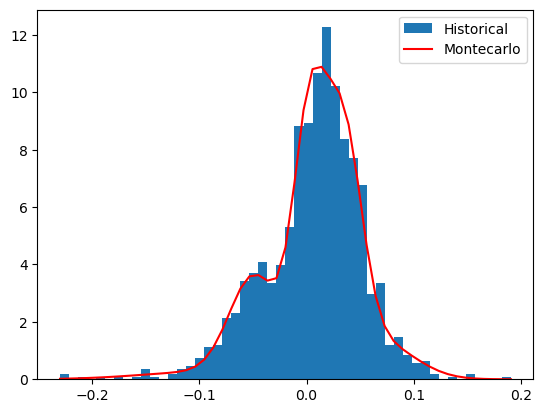

In [33]:

plt.hist(pl, bins = 50, density = True, cumulative = False, label = 'Historical')

plt.plot(edges, np.exp(prob), color = 'r', label = 'Montecarlo')
plt.legend()

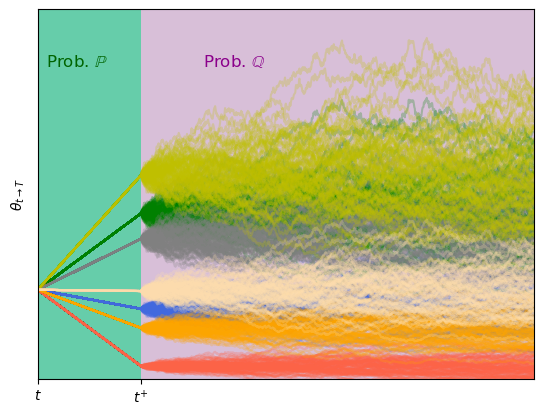

In [15]:
from matplotlib.patches import Rectangle
Spot = 1
r = 0.01
Vol = 0.2

TTM = 1

colors = ['tomato', 'royalblue', 'green', 'orange', 'grey', 'y', 'navajowhite']

Spot_array = [0.4, 0.85, 1.6, 0.7, 1.4, 1.9, 0.99]

sims = 100

num_steps = 1000
delta_time = TTM / num_steps

Brownian = np.random.normal(0, 1, size = (sims,num_steps)) * np.sqrt(delta_time)

log_ret = np.exp((r - 0.5 * Vol ** 2) * delta_time + Vol * Brownian)

delta = 0.25

times = np.concatenate((np.array([0,delta]), delta + np.linspace(delta_time,TTM, num_steps)))

for s, color in zip(Spot_array, colors):

  spot_t = np.concatenate((Spot*np.ones((sims,1)), np.cumprod(np.concatenate((s*np.ones((sims,1)),log_ret), axis = 1), axis = 1)), axis = 1)

  plt.plot(times, spot_t.T, color = color, alpha =0.25)

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, 0.2), 0.25, 3, facecolor="mediumaquamarine"))
currentAxis.add_patch(Rectangle((0.25, 0.2), 1, 3, facecolor="thistle"))

currentAxis.text(0.02,2.75,'Prob. $\mathbb{P}$', color = 'darkgreen', fontsize = 12)

currentAxis.text(0.4,2.75,'Prob. $\mathbb{Q}$', fontsize = 12, color = 'darkmagenta')

plt.xlim(0,1.2)
plt.ylim(0.3,3.2)
plt.xticks([0,0.25], [r'$t$', r'$t^{+}$'])
plt.yticks([],[])
plt.ylabel(r'$\theta_{t \rightarrow T}$')

plt.savefig(PATH_FIGS + "MCSquared.pdf")

In [16]:
GM = GaussianMixture(n_components = 6)

GM.fit(rets)

GaussianMixture(n_components=6)

In [17]:
rets.max()

0.226808121061985

In [18]:
a, b = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))

In [19]:
a

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.2222222

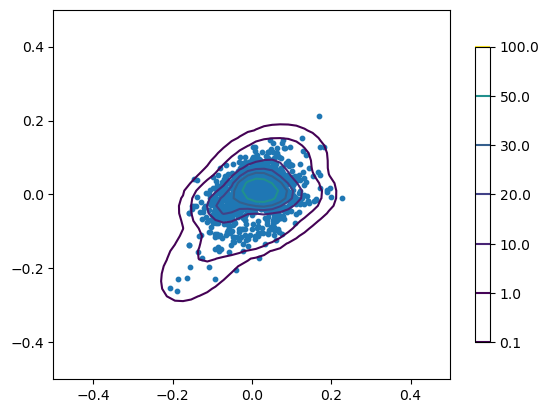

In [20]:
x = np.linspace(-0.5, 0.5)
y = np.linspace(-0.5, 0.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = np.exp(GM.score_samples(XX))
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, [0.1,1,10,20, 30, 50, 100])#, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
# )
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(rets[:, 0], rets[:, 1], 10)

In [21]:

def plot_points_predict(simul_results,XY_labels ,save_path_file=None):
    """
    Generates and optionally saves a 3D plot of simulation results.

    This function creates a 3D plot using Plotly, visualizing the data points and
    the model's predictions based on the input simulation results. 

    Parameters:
    simul_results (dict): A dictionary containing 'X1', 'X2', 'Y', and 'model' keys.
                          'X1' and 'X2' are lists or arrays of data points, 'Y' is the 
                          corresponding output, and 'model' is the trained model.
    save_path (str, optional): Path where the HTML output of the plot will be saved and file name. 
                               If not provided, the plot is not saved to a file.

    Returns:
    None
    """

    # Determine the range of X1 and X2 values
    x1_min, x1_max = np.min(simul_results['X1']), np.max(simul_results['X1'])
    x2_min, x2_max = np.min(simul_results['X2']), np.max(simul_results['X2'])

    # Generate a mesh grid for X1 and X2 values
    X1_Grid, X2_Grid = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                                   np.linspace(x2_min, x2_max, 100))

    # Initialize the grid for model predictions
    Y_Grid = np.zeros((100, 100))

    # Populate Y_Grid with model predictions for each point in the grid
    for i in range(100):
        for j in range(100):
            Y_Grid[i, j] = np.exp(simul_results['model'].score_samples([[X1_Grid[i, j], X2_Grid[i, j]]]))

    # Create lines for the 3D plot
    lines = [go.Scatter3d(x=i, y=j, z=k, mode='lines', line=dict(color='rgb(50, 50, 255)', width=1))
             for i, j, k in zip(X1_Grid, X2_Grid, Y_Grid)]
    lines += [go.Scatter3d(x=i, y=j, z=k, mode='lines', line=dict(color='rgb(50, 50, 255)', width=1))
              for i, j, k in zip(X1_Grid.T, X2_Grid.T, Y_Grid.T)]

    # Add the 3D scatter plot of actual data points
    trace1 = go.Scatter3d(
        x=simul_results['X1'],
        y=simul_results['X2'],
        z=simul_results['Y'],
        mode='markers',
        marker=dict(
            size=2,
            color=simul_results['Y'],  # Color by the Y values
            colorscale='Portland',     # Choose a colorscale
            opacity=1.0
        )
    )
    lines.append(trace1)

    # Define the layout of the plot
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title=XY_labels[0], color='black'),
            yaxis=dict(title=XY_labels[1], color='black'),
            zaxis=dict(title='Density', color='black'),
        ),
        width=700,
        margin=dict(r=20, b=10, l=10, t=10),
        showlegend=False,
    )

    # Generate the figure
    fig = go.Figure(data=lines, layout=layout)
    iplot(fig, filename='elevations-3d-surface')

    # Save the plot as HTML if a save path is provided
    if save_path_file:
        fig.write_html(save_path_file)


In [22]:
my_dict = {'X1': rets[:,0], 'X2': rets[:,1], 'Y': -50+np.zeros_like(rets[:,0]), 'model': GM}

In [25]:
Miscellanea.plot_points_predict(my_dict, ['Apple Spot 10d log returns', 'IBM Spot 10d log returns'], 
                                PATH_FIGS + 'Gaussian_Mixture.html')

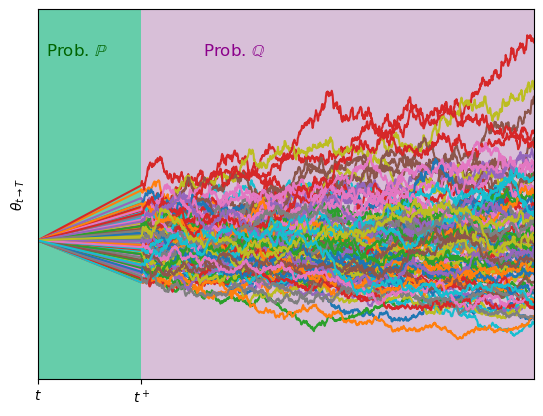

In [26]:
from matplotlib.patches import Rectangle
Spot = 1
r = 0.01
Vol = 0.2

TTM = 1

colors = ['tomato', 'royalblue', 'green', 'orange', 'grey', 'y', 'navajowhite']

Spot_array = [0.4, 0.85, 1.6, 0.7, 1.4, 1.9, 0.99]

sims = 100

num_steps = 1000
delta_time = TTM / num_steps

Brownian = np.random.normal(0, 1, size = (sims,num_steps)) * np.sqrt(delta_time)



delta = 0.25

brow = np.random.normal(0, 1, size = (sims,1)) * np.sqrt(delta)

Brownian = np.concatenate((brow,Brownian), axis = 1)

log_ret = np.exp((r - 0.5 * Vol ** 2) * delta_time + Vol * Brownian)

times = np.concatenate((np.array([0,delta]), delta + np.linspace(delta_time,TTM, num_steps)))

spot_t = np.cumprod(np.concatenate((Spot*np.ones((sims,1)),log_ret), axis = 1), axis = 1)

plt.plot(times, spot_t.T)

# for s, color in zip(Spot_array, colors):

#   spot_t = np.concatenate((Spot*np.ones((sims,1)), np.cumprod(np.concatenate((s*np.ones((sims,1)),log_ret), axis = 1), axis = 1)), axis = 1)

#   plt.plot(times, spot_t.T, color = color, alpha =0.25)

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, 0.2), 0.25, 3, facecolor="mediumaquamarine"))
currentAxis.add_patch(Rectangle((0.25, 0.2), 1, 3, facecolor="thistle"))

currentAxis.text(0.02,1.8,'Prob. $\mathbb{P}$', color = 'darkgreen', fontsize = 12)

currentAxis.text(0.4,1.8,'Prob. $\mathbb{Q}$', fontsize = 12, color = 'darkmagenta')

plt.xlim(0,1.2)
plt.ylim(0.4,2.0)
plt.xticks([0,0.25], [r'$t$', r'$t^+$'])
plt.yticks([],[])
plt.ylabel(r'$\theta_{t \rightarrow T}$')

plt.savefig(PATH_FIGS + "MC.pdf")
